SIMULATING AN ORBITAL SYSTEM


1.   Brute Force


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Initialization of Simulation Parameters



In [35]:
t0 = 0
dt = 86400
tf = 86400* 365 * 10
G = 6.67e-11

t = np.arange(0,tf+dt, dt)
r = np.zeros((len(t),3,9))
v = np.zeros((len(t),3,9))
m = np.array([1.989*10**6,0.33011,4.867,5.97,0.64,1898,568.34,86.81,102.41])*10**24
r[0,0,:]=np.array([0,57.9,108.21,149.59,227.92,778.57,1453.53,2872.46,4495.06])*10**9
v[0,1,:]=np.array([0,47.36,35.02,29.78,24.07,13,9.68,6.8,5.43])*10**3

Propagation

In [36]:
for i in range(len(t)-1):#Time-Frame
  for j in range(5):# 5 = No. of Planets
    a = np.zeros(3) # acceleration vector
    for k in range(5):
      if k!= j:
        Rmag = np.linalg.norm(r[i,:,j]-r[i,:,k])
        a[:] += -((G*m[k])/(Rmag)**2)* (r[i,:,j]-r[i,:,k])/(Rmag)
    v[i+1,:,j] = v[i,:,j] + a[:]*dt
    r[i+1,:,j] = r[i,:,j] + v[i+1,:,j]*dt

Plotting

Text(0.5, 0.92, 'Oribtal Motion(Brute Force)')

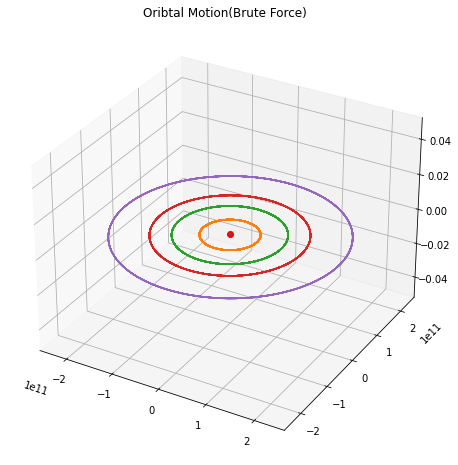

In [37]:
fig = plt.figure(figsize = (8,8))
#fig = plt.figure(dpi=600)
ax = plt.axes(projection='3d')
ax.grid()
ax.plot(0,0,0,'or', label = 'Sun positon')      
for i in range(5):            # yellow marker
    ax.plot3D(r[:,0,i],r[:,1,i],r[:,2,i], markersize = 0.1)
ax.set_title('Oribtal Motion(Brute Force)')

Animation 

/tmp/ipykernel_10279/7528572.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  line_e,     = ax.plot([],[],'-g',lw=1,c='blue')


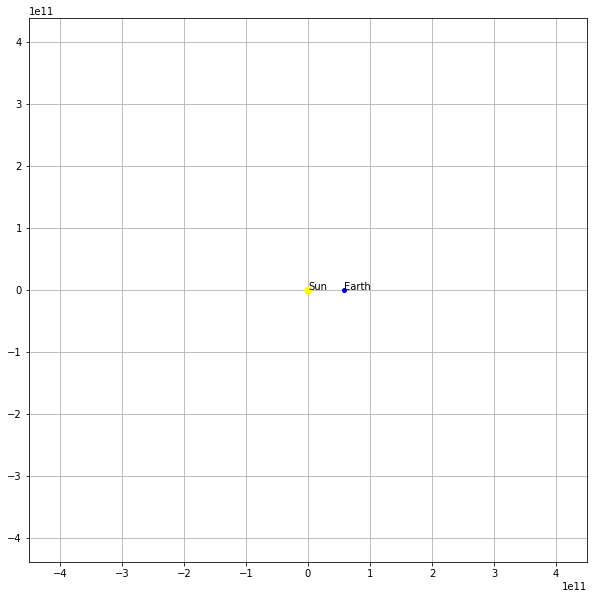

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()
AU          = 1.5e11                    # earth sun distance

line_e,     = ax.plot([],[],'-g',lw=1,c='blue')
point_e,    = ax.plot([AU], [0], marker="o"
                      , markersize=4
                      , markeredgecolor="blue"
                      , markerfacecolor="blue")
text_e      = ax.text(AU,0,'Earth')

point_s,    = ax.plot([0], [0], marker="o"
                      , markersize=7
                      , markeredgecolor="yellow"
                      , markerfacecolor="yellow")
text_s      = ax.text(0,0,'Sun')

exdata,eydata = [],[]                   # earth track
sxdata,sydata = [],[]                   # sun track

def update(i):
    exdata.append(r[i,0,1])
    eydata.append(r[i,1,1])
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(r[i,0,1],r[i,1,1])
    text_e.set_position((r[i,0,1],r[i,1,1]))

    point_s.set_data(r[i,0,0],r[i,1,0])
    text_s.set_position((r[i,0,0],r[i,1,0]))
    ax.axis('equal')
    ax.set_xlim(-3*AU,3*AU)
    ax.set_ylim(-3*AU,3*AU)

    return line_e,point_s,point_e,text_e,text_s

anim = animation.FuncAnimation(fig
                                ,func=update
                                ,frames=len(t)
                                ,interval=1
                                ,blit=True)
plt.show()
